In [1]:
import numpy as np
import pandas as pd
import cv2      #for computer vision
import os         
from glob import glob    

In [2]:
images_path = '../input/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')        #this is done in order to extract all the images path from images folder in the dataset
len(images)                               #total no. of images that are available in the dataset 

                                          #images contain all the images path in the image directory

8091

In [3]:
images[:5]                       

['../input/flickr8k-sau/Flickr_Data/Images/3226254560_2f8ac147ea.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/214543992_ce6c0d9f9b.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2366643786_9c9a830db8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3368819708_0bfa0808f8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2190227737_6e0bde2623.jpg']

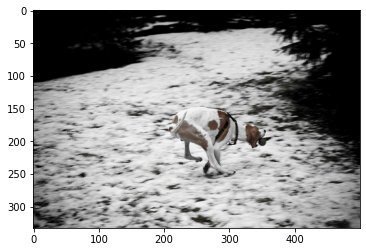

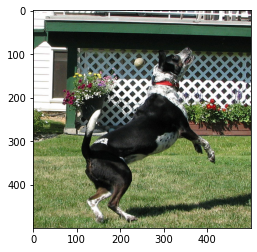

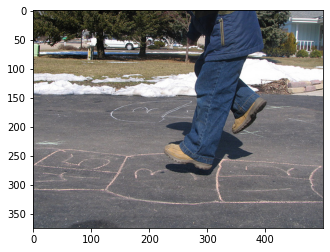

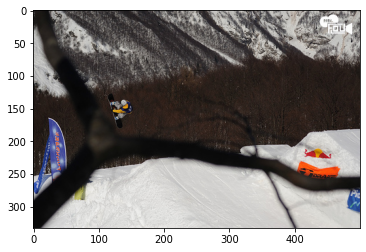

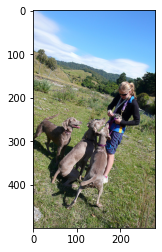

In [4]:
#this cell right here plots 0 to 4 images usinf matplotlib library
import matplotlib.pyplot as plt

for i in range(5): 
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
from tensorflow.python.keras.applications.resnet import ResNet50

In [7]:
incept_model = ResNet50(include_top=True)

2022-11-12 05:39:31.674546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 05:39:31.785833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 05:39:31.786648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 05:39:31.788385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

102973440/102967424 [==============================] - 4s 0us/step


In [8]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [9]:
images_features = {}             
count = 0
for i in images:
    img = cv2.imread(i)                             #imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      #this is done to convert the image using cv2 from BGR to RGB
    img = cv2.resize(img, (224,224))                          
    
    img = img.reshape(1,224,224,3)        #resnet takes the imput as 224X224X3.Here 3 stands for RGB color channels.  
    pred = modele.predict(img).reshape(2048,)           #we are choosing that layer of ResNet50 which gives 2048 as output. Here the dimension of output vector is 2048.
                                                        #here pred is the 2048 image vector
    img_name = i.split('/')[-1]                         #here we are splitting so as to just grab the name of the image
    
    images_features[img_name] = pred                   #Now the images_feature dictionary has img_name as its "key" and pred i.e 2048 vector as its "value".
    
    count += 1
    
    if count > 1700:                                   #we are only taking 1500 images to train the model
        break
        
    elif count % 50 == 0:
        print(count)

2022-11-12 05:39:40.032188: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-12 05:39:41.994106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700


In [10]:
len(images_features)                     #we are going to tain our model with 1500 image - caption pair.

1701

# # PREPROCESSING OF CAPTIONS

In [11]:
caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt' #path of caption directory 

In [12]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')         #we are using "open" so as to read this text file 

In [13]:
captions               #here captions is the list that contains all the images alog with its captions.
                       #remember an image has 5 captions each .

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [14]:
len(captions)


40461

In [15]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]              #image name is again the name of an image. By doing [:-2] we are getting rid of "#4".
        caption = i.split('\t')[1]
        if img_name in images_features: 
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [16]:
captions_dict                    #here the captions_dict is a dictionary whose key is the image_name (string datatype) and value is the list of all the captions related to that image.(list datatype)

{'1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a girl with pigtails sitting in front of a rainbow painting .',
  'Young girl with pigtails painting outside in the grass .'],
 '102351840_323e3de834.jpg': ['A man drilling a hole in the ice .',
  'A man is drilling through the frozen ice of a pond .',
  'A person in the snow drilling a hole in the ice .',
  'A person standing on a frozen lake .',
  'Two men are ice fishing .'],
 '1024138940_f1fefbdce1.jpg': ['Two different breeds of brown and white dogs play on the beach .',
  'Two dogs are making a turn on a soft sand beach .',
  'Two dogs playing in the sand at the beach .',
  'Two dogs playing together on a beach .',
  'Two large tan dogs play along a sandy beach .'],
 '10320

In [17]:
len(captions_dict)                    

1701

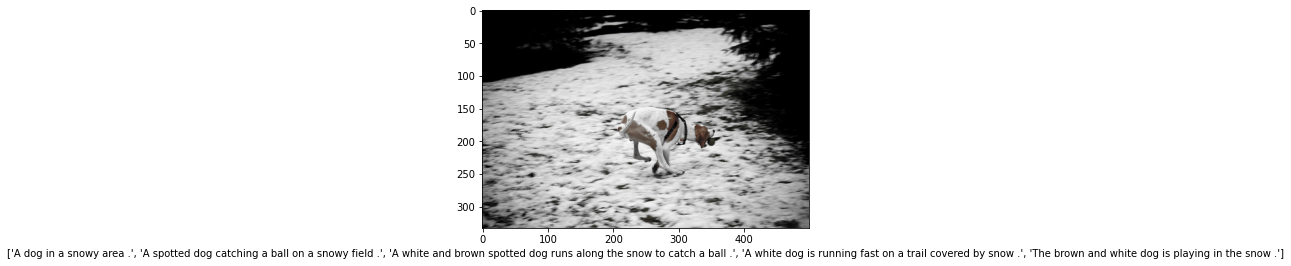

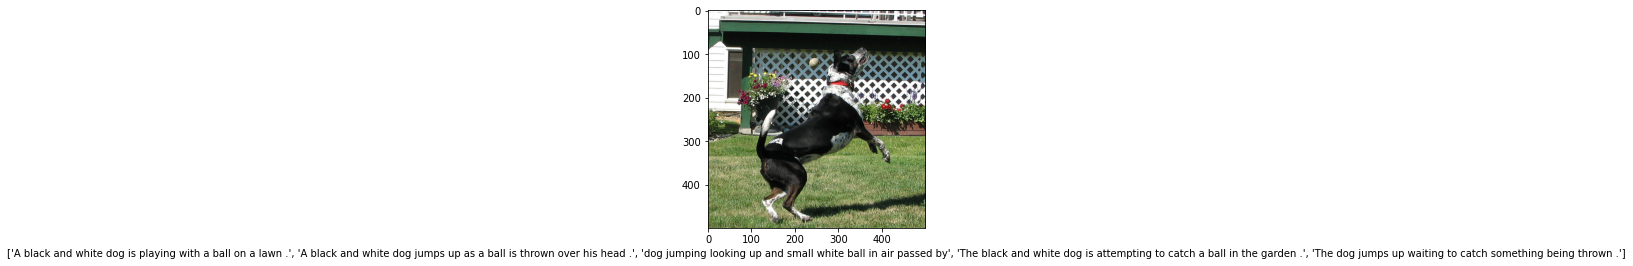

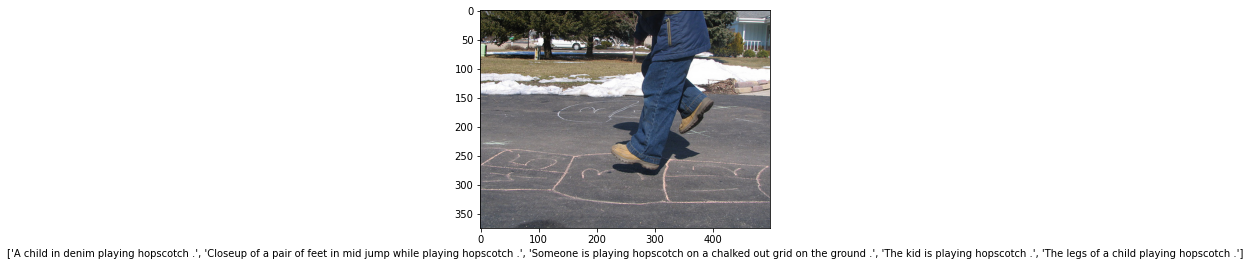

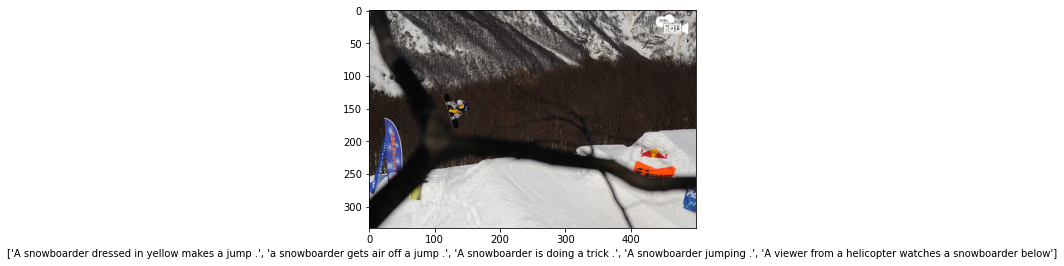

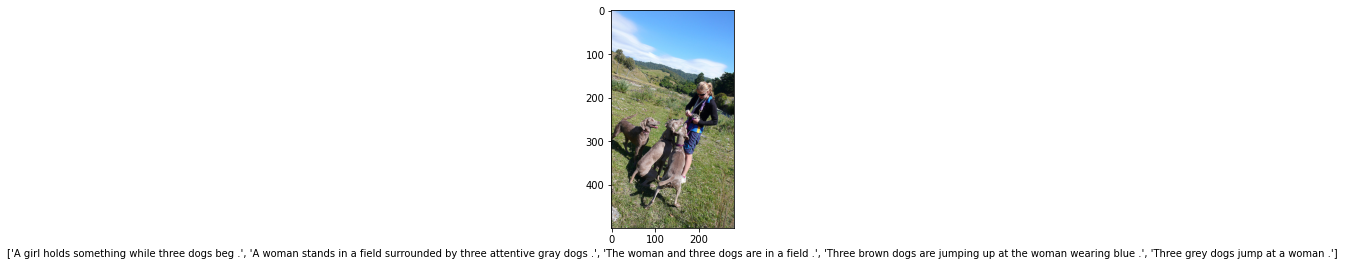

In [18]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

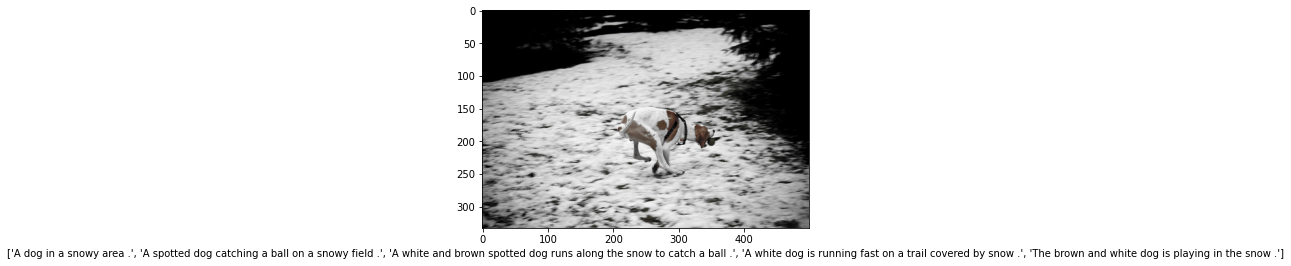

In [19]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '../input/flickr8k-sau/Flickr_Data/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [20]:
#this function  adds startofseq in the beginning of the captions and endofseq in the end of the captions.

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified                                      
    

In [21]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [22]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [23]:
len(count_words)              #these are the total number of words in our captions corpus

4349

In [24]:
count_words          #count_words is a dictionary which contains the all the words that are the captions along with their frquency as the value.

{'startofseq': 8504,
 'a': 13192,
 'little': 386,
 'girl': 713,
 'covered': 63,
 'in': 4090,
 'paint': 10,
 'sits': 122,
 'front': 292,
 'of': 1331,
 'painted': 11,
 'rainbow': 11,
 'with': 1729,
 'her': 229,
 'hands': 45,
 'bowl': 7,
 '.': 7711,
 'endofseq': 8504,
 'is': 1910,
 'sitting': 278,
 'large': 225,
 'small': 256,
 'the': 3713,
 'grass': 356,
 'plays': 115,
 'fingerpaints': 1,
 'white': 952,
 'canvas': 2,
 'on': 2278,
 'it': 93,
 'there': 64,
 'pigtails': 3,
 'painting': 11,
 'young': 562,
 'outside': 169,
 'man': 1453,
 'drilling': 2,
 'hole': 4,
 'ice': 47,
 'through': 442,
 'frozen': 7,
 'pond': 16,
 'person': 291,
 'snow': 298,
 'standing': 379,
 'lake': 80,
 'two': 1316,
 'men': 268,
 'are': 787,
 'fishing': 27,
 'different': 13,
 'breeds': 0,
 'brown': 547,
 'and': 1930,
 'dogs': 535,
 'play': 167,
 'beach': 200,
 'making': 42,
 'turn': 13,
 'soft': 5,
 'sand': 95,
 'playing': 436,
 'at': 628,
 'together': 87,
 'tan': 84,
 'along': 119,
 'sandy': 19,
 'tent': 25,
 'bein

In [25]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [26]:
len(new_dict)

4349

In [27]:
new_dict['<OUT>'] = len(new_dict) 

In [28]:
captions_backup = captions_dict.copy()


In [29]:
captions_dict = captions_backup.copy()

In [30]:
#to convert strings to integer.

for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [31]:
captions_dict                         #this dictionary contains the name of the  image as "key" and the list of integers (captions) as its "value".

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '102351840_323e3de834.jpg': [[1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18],
  [1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 43, 45, 29, 2, 41, 46, 17, 18],
  [1, 47, 48, 49, 39, 50, 17, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18],
  [1, 47, 55, 49, 58, 2, 59, 29, 2, 60, 61, 57, 17, 18],
  [1, 47, 55, 62, 6, 23, 61, 63, 23, 57, 17, 18],
  [1

# # BUILD GENERATOR FUNCTION

In [32]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [33]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 193, 203, 6, 2, 77, 204, 54, 77, 205, 206, 2, 53, 207, 118, 2, 41, 46, 54, 208, 209, 17, 18]
[1, 2, 193, 178, 2, 77, 218, 19, 223, 2, 228, 10, 2, 146, 54, 2, 4, 29, 23, 229, 13, 229, 219, 17, 18]
[1, 2, 146, 203, 6, 576, 140, 54, 2, 279, 138, 233, 29, 2, 57, 13, 98, 81, 27, 54, 77, 577, 54, 2, 324, 578, 579, 165, 17, 18]
[1, 23, 47, 34, 191, 49, 6, 112, 54, 27, 1140, 54, 1141, 350, 313, 6, 2, 527, 81, 364, 49, 69, 1142, 221, 2, 36, 1143, 6, 1140, 54, 2, 403, 18]
[1, 350, 201, 27, 109, 19, 35, 23, 170, 81, 516, 27, 109, 13, 2, 112, 2421, 29, 253, 330, 19, 163, 83, 2, 700, 511, 170, 350, 161, 258, 221, 2, 255, 256, 17, 18]


In [34]:
MAX_LEN

36

In [35]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '102351840_323e3de834.jpg': [[1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18],
  [1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 43, 45, 29, 2, 41, 46, 17, 18],
  [1, 47, 48, 49, 39, 50, 17, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18],
  [1, 47, 55, 49, 58, 2, 59, 29, 2, 60, 61, 57, 17, 18],
  [1, 47, 55, 62, 6, 23, 61, 63, 23, 57, 17, 18],
  [1

In [36]:
Batch_size = 5000
VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]                   

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [37]:
from keras.preprocessing.sequence import pad_sequences

In [38]:
X, y_in, y_out = generator(images_features, captions_dict)

In [39]:
len(X), len(y_in), len(y_out)

(109245, 109245, 109245)

In [40]:
#this is done so as to get faster processing
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')


In [41]:
X.shape, y_in.shape, y_out.shape

((109245, 2048), (109245, 36), (109245, 4350))

In [42]:
X[1510]

array([0.00245637, 0.6232479 , 0.68544203, ..., 0.41578805, 1.1413945 ,
       0.3384066 ], dtype=float32)

In [43]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# # MODEL

In [44]:
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [45]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 36, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           556800    
_________________________________________________________________
lstm (LSTM)                  (None, 36, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 128)           32896     
Total params: 983,936
Traina

In [46]:
model.fit([X, y_in], y_out, batch_size=512, epochs=200)

2022-11-12 05:41:42.377769: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1900863000 exceeds 10% of free system memory.
2022-11-12 05:41:45.128938: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1900863000 exceeds 10% of free system memory.


Epoch 1/200
214/214 [==============================] - 18s 61ms/step - loss: 5.1296 - accuracy: 0.1599
Epoch 2/200
214/214 [==============================] - 13s 61ms/step - loss: 4.5458 - accuracy: 0.2400
Epoch 3/200
214/214 [==============================] - 13s 61ms/step - loss: 4.3549 - accuracy: 0.2573
Epoch 4/200
214/214 [==============================] - 13s 61ms/step - loss: 4.2153 - accuracy: 0.2706
Epoch 5/200
214/214 [==============================] - 13s 61ms/step - loss: 3.9873 - accuracy: 0.2924
Epoch 6/200
214/214 [==============================] - 13s 61ms/step - loss: 3.7902 - accuracy: 0.3144
Epoch 7/200
214/214 [==============================] - 13s 61ms/step - loss: 3.6303 - accuracy: 0.3298
Epoch 8/200
214/214 [==============================] - 13s 61ms/step - loss: 3.4891 - accuracy: 0.3449
Epoch 9/200
214/214 [==============================] - 13s 61ms/step - loss: 3.3673 - accuracy: 0.3586
Epoch 10/200
214/214 [==============================] - 13s 61ms/step - l

In [47]:
inv_dict = {v:k for k, v in new_dict.items()}

In [48]:
model.save('model.h5')

In [49]:
model.save_weights('mine_model_weights.h5')

In [50]:
np.save('vocab.npy', new_dict)


In [51]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# # PREDICTIONS

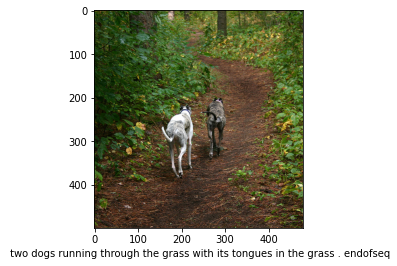

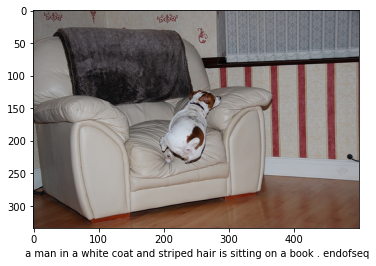

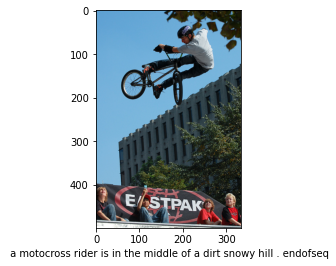

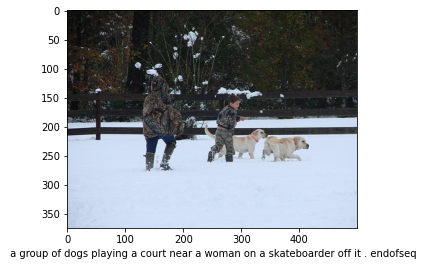

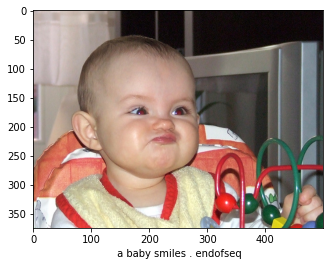

In [52]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1
        
        
        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)